In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
t_undamped,s_undamped=np.transpose(np.loadtxt('1.csv',delimiter=','))
e_t,e_s=0.01,0.0001
print(t_undamped,s_undamped)

t_undamped_peak,a_undamped=np.transpose(np.loadtxt('undumped.csv',delimiter=','))
e_a=0.01
print(t_undamped_peak,a_undamped)

t_damped_peak,a_damped=np.transpose(np.loadtxt('dumped.csv',delimiter=','))
print(t_damped_peak,a_damped)

[ 0.16  0.17  0.18 ... 14.98 14.99 15.  ] [ 1.266   0.8546  0.4222 ... -3.4637 -3.3966 -3.3057]
[ 0.    0.93  1.89  2.86  3.83  4.8   5.76  6.73  7.7   8.67  9.63 10.58
 11.59 12.54 13.5  14.49] [6.01 5.73 5.32 4.92 4.7  4.53 4.46 4.16 3.87 3.72 3.58 3.4  3.13 2.87
 2.77 2.61]
[ 0.52  1.5   2.48  3.45  4.44  5.42  6.38  7.37  8.28  9.32 10.3  11.26
 12.24 13.25 14.22] [4.79 3.56 2.86 2.27 1.84 1.53 1.31 0.93 0.91 0.62 0.53 0.57 0.4  0.33
 0.31]


In [16]:
def chisq(x,y,ey,a, b):
    return np.sum((y -a*x -b)**2/ey**2)

def dsinmod(t,a,g,w):
    return a*np.exp(-g*t/2)*np.cos(w*t)

def sinmod(t,a,w,th):
    return a*np.cos(w*t-th)

In [5]:
yerr_undamped=[]
for i in range(len(a_undamped)):
    yerr_undamped.append(e_a/a_undamped[i])
    
print(yerr_undamped)

yerr_damped=[]
for i in range(len(a_damped)):
    yerr_damped.append(e_a/a_damped[i])
    
print(yerr_damped)

[0.0016638935108153079, 0.001745200698080279, 0.0018796992481203006, 0.0020325203252032522, 0.002127659574468085, 0.002207505518763797, 0.002242152466367713, 0.002403846153846154, 0.002583979328165375, 0.0026881720430107525, 0.002793296089385475, 0.0029411764705882353, 0.0031948881789137383, 0.003484320557491289, 0.0036101083032490976, 0.003831417624521073]
[0.0020876826722338207, 0.0028089887640449437, 0.003496503496503497, 0.004405286343612335, 0.005434782608695652, 0.006535947712418301, 0.007633587786259542, 0.01075268817204301, 0.010989010989010988, 0.016129032258064516, 0.018867924528301886, 0.01754385964912281, 0.024999999999999998, 0.030303030303030304, 0.03225806451612903]


In [6]:
p1,cov1=np.polyfit(t_undamped_peak,np.log(a_undamped),1,cov=True)
fit_undamped=np.polyval(p1,t_undamped_peak)

p2,cov2=np.polyfit(t_damped_peak,np.log(a_damped),1,cov=True)
fit_damped=np.polyval(p2,t_damped_peak)

print(cov1)
print(cov2)

[[ 1.66579118e-06 -1.20249301e-05]
 [-1.20249301e-05  1.19907605e-04]]
[[ 4.01935627e-05 -2.95905008e-04]
 [-2.95905008e-04  2.89546789e-03]]


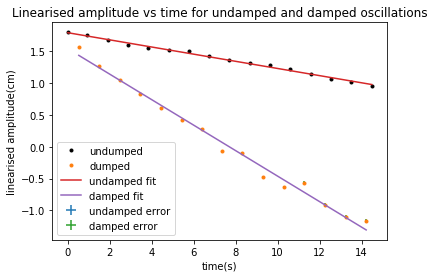

In [7]:
plt.plot(t_undamped_peak,np.log(a_undamped),'k.',label='undumped')
plt.errorbar(t_undamped_peak,np.log(a_undamped),xerr=e_t,yerr=yerr_undamped,linestyle="None",label='undamped error')

plt.plot(t_damped_peak,np.log(a_damped),'.',label='dumped')
plt.errorbar(t_damped_peak,np.log(a_damped),xerr=e_t,yerr=yerr_damped,linestyle="None",label='damped error')

plt.plot(t_undamped_peak,fit_undamped,label='undamped fit')
plt.plot(t_damped_peak,fit_damped,label='damped fit')
\
plt.title('Linearised amplitude vs time for undamped and damped oscillations')
plt.xlabel('time(s)')
plt.ylabel('linearised amplitude(cm)')
plt.legend()
plt.plot()
plt.show()

In [8]:
#-gamma/2=m
#b=ln(A)
gamma_undamped= -2*p1[0]
gamma_damped=-2*p2[0]

e_gamma_undamped=np.sqrt(cov1[0][0])*2
e_gamma_damped=np.sqrt(cov2[0][0])*2

print(gamma_undamped, e_gamma_undamped)
print(gamma_damped,e_gamma_damped)

0.11217241515481172 0.0025813106563975807
0.3997252413557323 0.012679678647949999


In [18]:
paras,covs=opt.curve_fit(sinmod,xdata=t_undamped,ydata=s_undamped)
print(paras)

[-0.1875617   0.94749003  0.68506142]


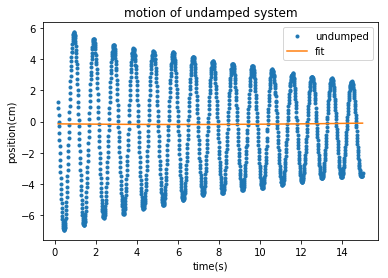

In [25]:
plt.plot(t_undamped,s_undamped,'.',label='undumped')
plt.plot(t_undamped,sinmod(t_undamped,paras[0],gamma_undamped,paras[2]),label='fit')
plt.title('motion of undamped system')
plt.xlabel('time(s)')
plt.ylabel("position(cm)")
plt.legend()
plt.show()